# Steps for building a machine learning model:

- Gaining the understanding of the project and what it is about

- Import libraries (atleast initial ones) 
- Import the data / Get the data 
- Data cleaning and understanding EDA: Exploratory data analysis:

    **Univariate analysis**
    - to look at the distribution in order to understand if there is an outlier present in the data Bi-variate analysis 
    - When we look at the relationship between two variables (Typically between the target variable
      (Selling price in this case and all the other variables) 
    
    **Multivariate analysis**
    - to check correlation between all the combination of features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
data = pd.read_csv("Cardekho.csv")
data.head(5)


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [3]:
data.shape

(15411, 14)

In [4]:
# summary statistics 
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [5]:
data['car_name'].value_counts()

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

In [6]:
data['fuel_type'].value_counts()

fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

In [7]:
data['mileage'].mean()

19.70115112581922

<Axes: xlabel='mileage', ylabel='Density'>

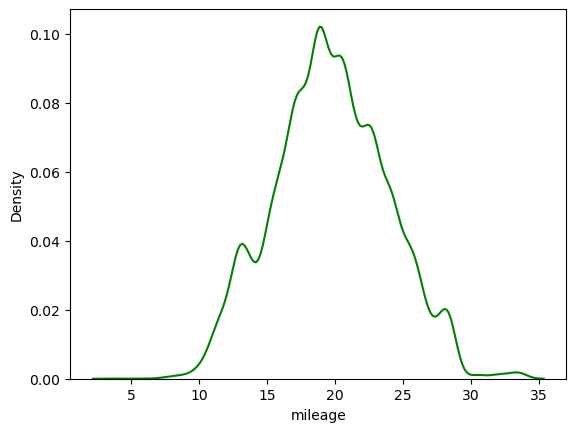

In [8]:
sns.kdeplot(x = data['mileage'],color = 'g')

<Axes: xlabel='seats', ylabel='Density'>

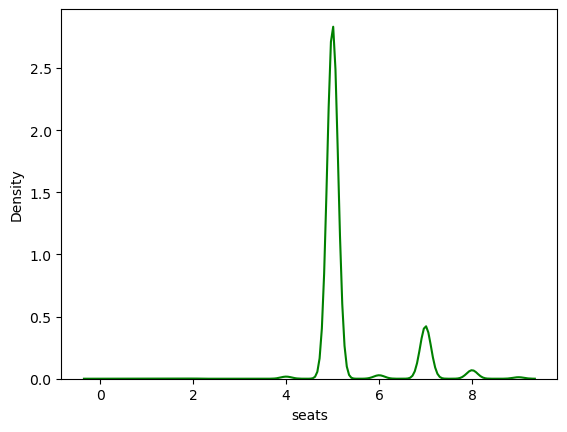

In [9]:
sns.kdeplot(x = data['seats'],color = 'g')

<Axes: xlabel='vehicle_age', ylabel='Density'>

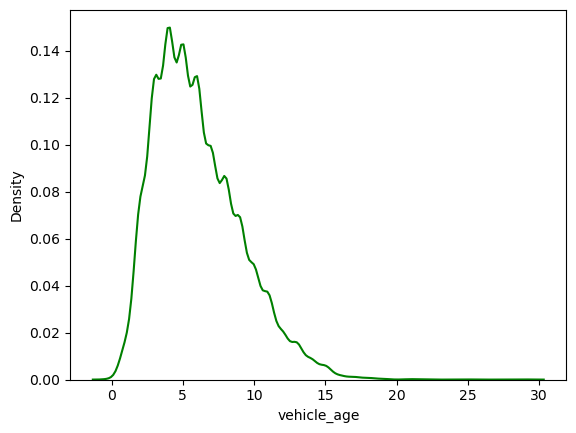

In [10]:
sns.kdeplot(x = data['vehicle_age'],color = 'g')

<Axes: xlabel='engine', ylabel='Density'>

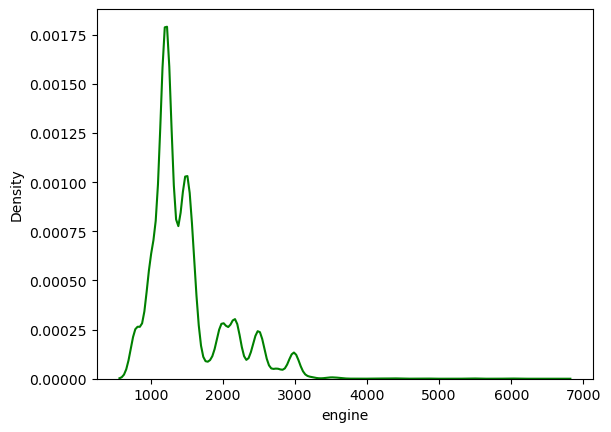

In [11]:
sns.kdeplot(x = data['engine'],color = 'g')

<Axes: xlabel='selling_price', ylabel='Density'>

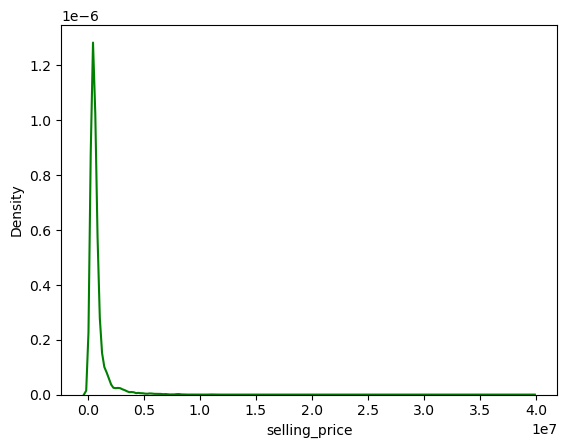

In [12]:
sns.kdeplot(x =data['selling_price'],color = 'g')

<Axes: xlabel='max_power', ylabel='Density'>

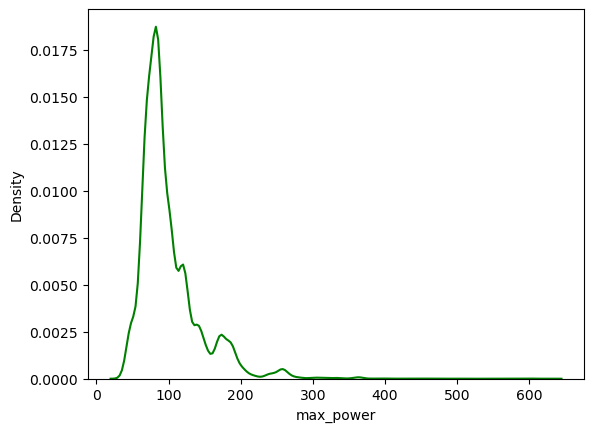

In [13]:
sns.kdeplot(x =data['max_power'],color = 'g')

<Axes: xlabel='km_driven', ylabel='Density'>

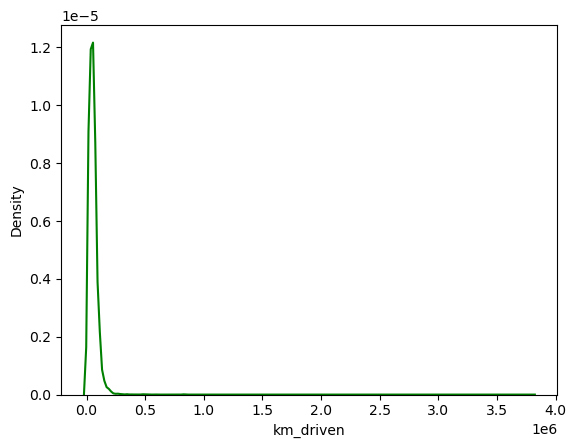

In [14]:
sns.kdeplot(x =data['km_driven'],color = 'g')

In [15]:
data[data['max_power'] >= 400]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1172,1508,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.50,5998,626.0,4,14500000
1209,1556,Porsche Cayenne,Porsche,Cayenne,4,36000,Dealer,Petrol,Automatic,12.50,3604,420.0,5,7800000
3799,4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000
9190,11816,Porsche Cayenne,Porsche,Cayenne,12,126000,Individual,Petrol,Automatic,8.50,4806,500.0,5,2000000
9364,12023,Porsche Cayenne,Porsche,Cayenne,4,24000,Dealer,Petrol,Automatic,12.50,3604,440.0,5,11100000
9450,12131,BMW 6,BMW,6,12,65000,Dealer,Petrol,Automatic,7.94,4395,450.0,4,1500000
9722,12456,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,3,4000,Dealer,Petrol,Automatic,7.81,4663,459.0,4,13000000
10040,12839,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
10969,13944,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
12067,15307,BMW 7,BMW,7,11,64000,Dealer,Petrol,Automatic,8.77,4395,402.0,5,1499000


<Axes: xlabel='seller_type', ylabel='count'>

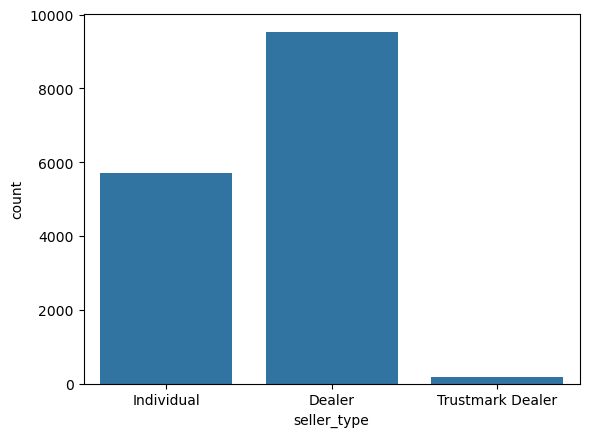

In [16]:
sns.countplot(x = data['seller_type'])

<Axes: xlabel='fuel_type', ylabel='count'>

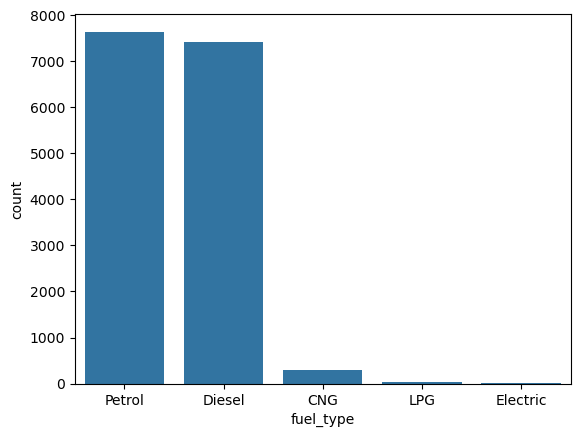

In [17]:
sns.countplot(x =data['fuel_type'])

<Axes: xlabel='transmission_type', ylabel='count'>

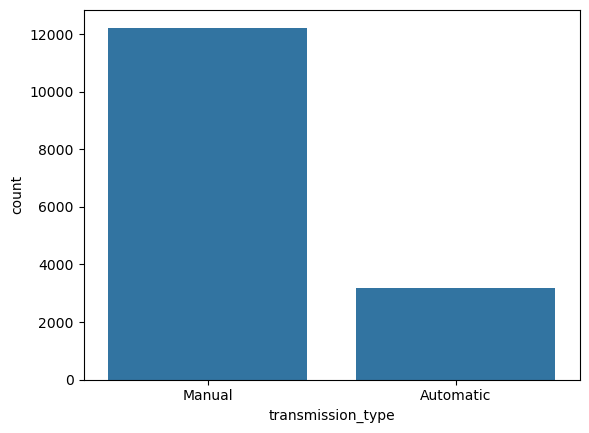

In [18]:
sns.countplot(x = data['transmission_type'])

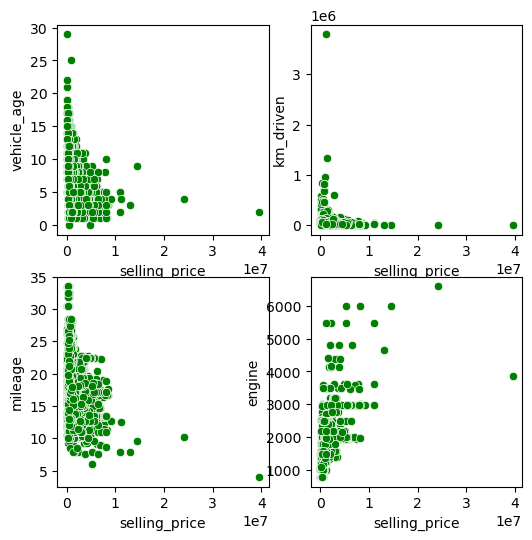

In [19]:
#Lets look at the relationship of each variable with the selling price (Target variable)

fig = plt.figure(figsize = (6,6))

features = ['vehicle_age','km_driven','mileage','engine']

for i in range(len(features)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = data, x = 'selling_price',y = features[i],color = 'g')


<Axes: xlabel='selling_price', ylabel='max_power'>

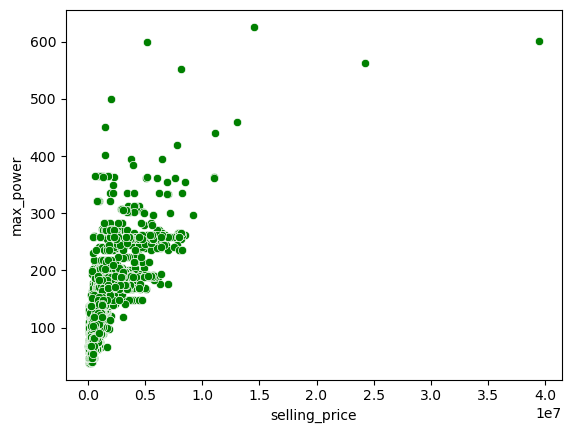

In [20]:
sns.scatterplot(data = data, x = 'selling_price', y = 'max_power',color  = 'g') 

<Axes: xlabel='selling_price', ylabel='vehicle_age'>

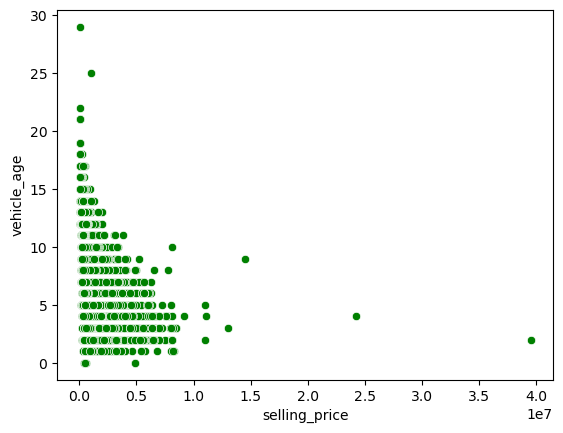

In [21]:
sns.scatterplot(data = data, x = 'selling_price', y =  'vehicle_age',color  = 'g') 

<Axes: xlabel='selling_price', ylabel='mileage'>

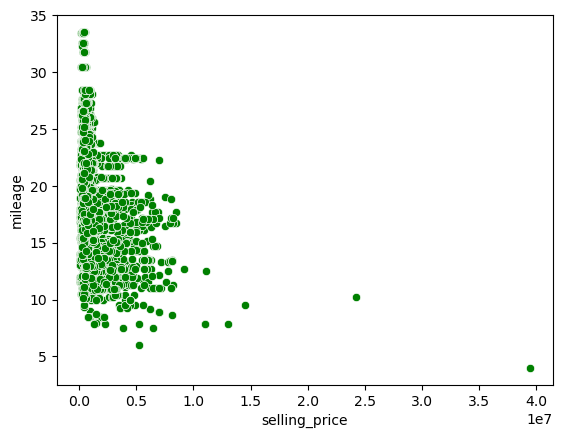

In [22]:
sns.scatterplot(data = data, x = 'selling_price', y =  'mileage',color  = 'g') 

<Axes: xlabel='selling_price', ylabel='km_driven'>

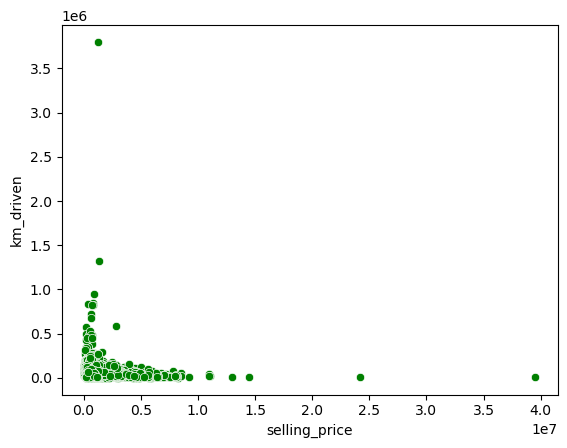

In [23]:
sns.scatterplot(data = data, x = 'selling_price', y =  'km_driven',color  = 'g') 

<Axes: xlabel='selling_price', ylabel='engine'>

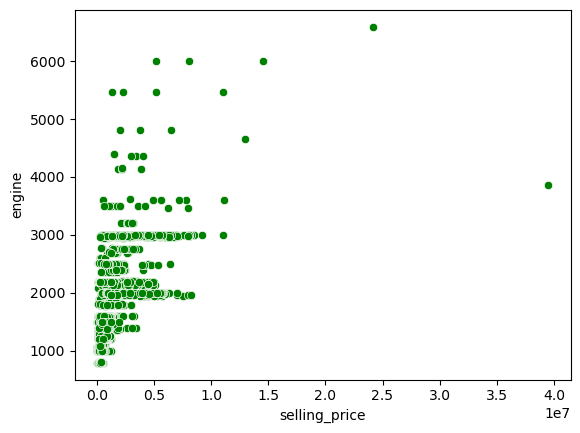

In [24]:
sns.scatterplot(data = data, x = 'selling_price', y =  'engine',color  = 'g') 

<Axes: xlabel='selling_price', ylabel='seats'>

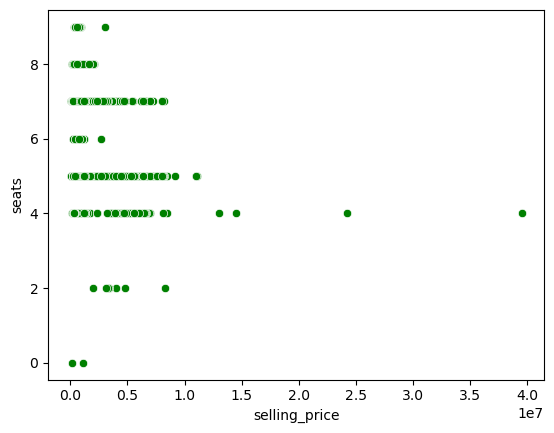

In [25]:
sns.scatterplot(data = data, x = 'selling_price', y =  'seats',color  = 'g') 

In [26]:
#Multi-variate analysis - to check correlation between all the combination of numerical features
features = ['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price']
data[features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

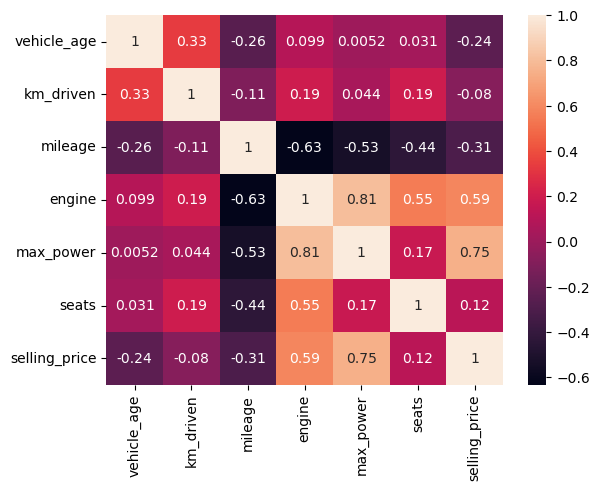

In [27]:
sns.heatmap(data = data[features].corr(),annot = True)

In [28]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [29]:
model_data = data.copy()
model_data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [30]:
model_data.drop(labels = 
['car_name','brand','model','seller_type'],axis = 1, inplace = True)
model_data

,Unnamed: 0,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,2,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,6,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,5,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000


In [31]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,19540,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,19541,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,19542,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
"""Linear regression - Modelling
Y (Target variable) = m1x1 + m2x2 + m3x3 ............
We will drop selling_price from independent variable"""
X = model_data.drop('selling_price', axis = 1)
# For getting the target variable we will just have selling_price
Y = model_data['selling_price']
Y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [33]:
# To divide the data into Train and Test 
train_X, test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2)
train_X
# 80% of the data goes to training and 20% of the data goes to testing

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
1181,1520,17,80000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6240,7983,6,44842,28.40,1248,74.02,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10514,13401,8,54000,20.50,1598,103.50,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14593,18501,4,44771,28.09,1373,91.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12547,15903,10,100000,17.80,1248,75.00,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9098,11704,2,11000,23.84,1199,84.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12695,16100,8,127000,11.50,2982,171.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7517,9610,10,100000,20.54,1598,103.60,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
991,1276,7,61251,20.45,1461,83.80,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# Applying regression for training the model
Regressor = LinearRegression().fit(train_X,train_Y)
Regressor
LinearRegression()
# Getting the predictions
prediction = Regressor.predict(test_X)
print(prediction)
print(test_Y)

[ 298764.80863926  561655.76228784  405226.04293342 ...   87698.49988432
 3303625.82548873   86586.84118008]
275       390000
13673     450000
1263      320000
3566     1400000
6791      565000
          ...   
15277     400000
4351      620000
9423      235000
14820    2250000
13059     425000
Name: selling_price, Length: 3083, dtype: int64


In [35]:
test_X['predicted_sales_price'] = prediction
test_X['Actual_price'] = test_Y
test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']
test_X


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
275,354,7,61500,23.40,1248,74.00,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.987648e+05,390000,-9.123519e+04
13673,17344,7,58100,22.70,1498,89.84,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.616558e+05,450000,1.116558e+05
1263,1623,7,40000,20.40,1197,81.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.052260e+05,320000,8.522604e+04
3566,4550,3,40000,17.60,2179,153.86,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.900448e+06,1400000,5.004485e+05
6791,8665,8,74000,22.70,1498,89.84,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.896784e+05,565000,-7.532163e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,19369,6,31200,20.40,1197,81.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.700867e+05,400000,7.008667e+04
4351,5525,8,50000,22.32,1582,126.32,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.055601e+06,620000,4.356011e+05
9423,12097,5,36000,22.70,799,53.64,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.769850e+04,235000,-1.473015e+05
14820,18788,9,110000,14.74,2993,270.90,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.303626e+06,2250000,1.053626e+06


In [36]:
mse = []
mse.append(mean_squared_error(y_true = test_Y,y_pred = prediction))
rmse = []
rmse.append(np.sqrt(mse))
rmse

[array([473172.14025473])]